# Using SQL with Python 

# 1)- Imorting key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
# for sql

from pandas.io import sql
import sqlite3
#for visuals
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)

# 2)- Loading dataset

### Clipboard

In [3]:
clip = pd.read_clipboard()
clip.head()

,,,"by_weekday_hour.unstack(0).plot(figsize=(16,8))"
plt.title('Trips,by,weekday,hour')
plt.ylabel('#,of,trips,started')
plt.xlabel('Hour,of,day'),None
plt.xticks(range(24)),NaN,NaN,None
"plt.xlim(0,",23);,NaN,None


In [4]:
# loading .db file
conn = sqlite3.connect('towed.db')
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed.columns

Index(['date', 'make', 'style', 'model', 'color', 'plate', 'state', 'towed_to',
       'facility_phone', 'inventory_num'],
      dtype='object')

In [5]:
towed.shape

(5065, 10)

In [6]:
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


# 3)- Data  Exploring

In [7]:
towed[100:105]

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
100,2014-11-18,FORD,4D,,SIL,B9455,NB,10300 S. Doty,(773) 568-8495,2750400
101,2014-11-18,BMW,4D,,WHI,V960806,IL,400 E. Lower Wacker,(312) 744-7550,917087
102,2014-11-18,DODG,PK,TK,RED,1382871B,IL,10300 S. Doty,(773) 568-8495,2750398
103,2014-11-18,CHEV,4D,,TAN,V356714,IL,10300 S. Doty,(773) 568-8495,2750397
104,2014-11-18,BUIC,4D,,WHI,S941660,IL,10300 S. Doty,(773) 568-8495,2750396


In [8]:
towed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [9]:
towed.describe()

,inventory_num
count,5.065000e+03
mean,4.547865e+06
std,2.115626e+06
min,8.160000e+03
25%,2.747381e+06
50%,2.750197e+06
75%,6.795649e+06
max,6.798366e+06


### 3.1)- Indexes

In [10]:
towed.head(2)

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129


In [11]:
towed.set_index('date', inplace=True)

In [12]:
towed.head(2)

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129


In [13]:

# SELECT *
# FROM towed
# WHERE date = '2014-11-04'
# LIMIT 5;
towed.loc['2014-11-04'][:5]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244


In [14]:
len(towed.loc['2014-11-04'])

70

In [15]:
# get a Series back (or individual values, if unique)
towed.ix['2014-11-04', 'make'][:5]

date
2014-11-04    LINC
2014-11-04    CHRY
2014-11-04    PLYM
2014-11-04    CHEV
2014-11-04    CHEV
Name: make, dtype: object

In [16]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04';
towed.reset_index(inplace=True)
towed[towed['date'] == '2014-11-04'][:5]

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244


In [17]:
len(towed[towed['date'] == '2014-11-04'])

70

Same like earlier method

In [18]:
# make those changes to orginal
towed.set_index('date', inplace=True)

### 3.2)-Selection

In [19]:
# just passing a list
cols = ['make', 'color', 'state'] 
towed[cols][:5]

,make,color,state
date,,,
2014-11-18,FORD,BLK,IL
2014-11-18,HOND,BLK,IL
2014-11-18,CHRY,SIL,IL
2014-11-18,HYUN,SIL,IL
2014-11-18,TOYT,WHI,IL


### 3.3)- Filtering

sort() was deprecated for DataFrames in favor of either:

- sort_values() to sort by column(s)
- sort_index() to sort by the index

In [20]:
# SELECT *
# FROM towed
# WHERE make = 'FORD'
# ORDER BY state DESC
# LIMIT 5;
towed[towed['make'] == 'FORD'].sort_values('state', ascending=False).head()

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-10,FORD,4D,,BLU,250WLU,WI,701 N. Sacramento,(773) 265-7605,6797787
2014-11-06,FORD,4D,,GRN,217WCX,WI,701 N. Sacramento,(773) 265-7605,6797379
2014-11-08,FORD,LL,,BLK,635FJE,WI,10300 S. Doty,(773) 568-8495,2749537
2014-10-19,FORD,LL,,BLK,178WDL,WI,10300 S. Doty,(773) 568-8495,464400
2014-10-06,FORD,2D,,ONG,198WJX,WI,701 N. Sacramento,(773) 265-7605,6794908


In [21]:
# SELECT *
# FROM towed
# WHERE color = 'BLK'
#   AND state = 'MI';
towed[(towed.color == 'BLK') & (towed.state == 'MI')]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-12,DODG,LL,,BLK,CLV6160,MI,701 N. Sacramento,(773) 265-7605,6797946
2014-09-08,CHEV,2D,,BLK,3KMT29,MI,10300 S. Doty,(773) 568-8495,2745448
2014-08-27,KIA,4D,,BLK,DAN1057,MI,701 N. Sacramento,(773) 265-7605,6791554


In [22]:
# SELECT *
# FROM towed
# WHERE make = 'PORS'
#   OR state = 'NY'
# ORDER BY make, color DESC;
towed[(towed.make == 'PORS') | (towed.state == 'NY')].sort_values(['make', 'color'], ascending=[True, False]) 

# not red Porshe

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


#### filter mask

In [23]:
# create a filter mask
m = (towed['style'] == '4D') & (towed.state == 'IL') 

In [24]:
print(m[:10])

date
2014-11-18    False
2014-11-18     True
2014-11-18    False
2014-11-18     True
2014-11-18     True
2014-11-18    False
2014-11-18    False
2014-11-18     True
2014-11-18    False
2014-11-18    False
dtype: bool


In [25]:
# it's just a boolean series
m.value_counts() 

True     2570
False    2495
dtype: int64

In [26]:
# for dataset call

towed[(towed['style'] == '4D') & (towed.state == 'IL')][:5]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128
2014-11-18,CHEV,4D,,BLK,E255028,IL,400 E. Lower Wacker,(312) 744-7550,917126
2014-11-18,MERZ,4D,,BLK,S796032,IL,10300 S. Doty,(773) 568-8495,2750423


In [27]:
# let's go back to masking part

# SELECT make, model, color
# FROM towed
# WHERE style = '4D' AND state = 'IL
# ORDER BY date
# LIMIT 5;
towed[m][['make', 'model', 'color']].sort_index().head() # using sort_index instead of sort_values

,make,model,color
date,,,
2014-08-20,BUIC,,GRY
2014-08-20,LEXS,,BLK
2014-08-21,NISS,,GRY
2014-08-21,HOND,,GRY
2014-08-21,PONT,,BLK


### 3.4)- checking duplicates

In [28]:
towed[towed.duplicated()]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,NISS,4D,,GRY,E203840,IL,400 E. Lower Wacker,(312) 744-7550,6798305
2014-11-06,BUIC,4D,,PLE,R4548,IL,701 N. Sacramento,(773) 265-7605,6797394
2014-11-03,FORD,4D,,BLK,S227831,IL,10300 S. Doty,(773) 568-8495,2749299
2014-10-19,MERZ,LL,TK,BLK,MINE-IP,IL,701 N. Sacramento,(773) 265-7605,6795998
2014-10-11,FORD,LL,,RED,,IL,10300 S. Doty,(773) 568-8495,2747534
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-04,CHEV,4D,LUM,WHI,S880655,IL,10300 S. Doty,(773) 568-8495,2745054
2014-09-03,CHEV,LL,,GRY,K585960,IL,10300 S. Doty,(773) 568-8495,2744980


# 4)- Joining

Take two datasets for this example

In [29]:
from datetime import datetime
# creating lambda function
to_datetime = lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M')

In [30]:
# see here: https://gist.github.com/gjreda/7433f5f70299610d9b6b
trips = pd.read_csv('Divvy_Trips_2013.csv',
                    converters={'starttime': to_datetime,'stoptime': to_datetime},
                    thousands=',')
stations = pd.read_csv('Divvy_Stations_2013.csv')

In [31]:
# or try this

#df = pd.read_csv('data/divvy/Divvy_Trips_2013.csv')
#df['starttime'] = df['starttime'].astype('datetime64[ns]')

In [32]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,42.0,Michigan Ave & Oak St,282.0,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,76.0,Racine Ave & Congress Pkwy,76.0,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,76.0,Racine Ave & Congress Pkwy,139.0,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,139.0,Loomis St & Taylor St,139.0,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,139.0,Loomis St & Taylor St,166.0,Halsted St & James M Rochford St,Customer,NaN,NaN


In [33]:
trips.shape

(759788, 12)

In [34]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759788 entries, 0 to 759787
Data columns (total 12 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 69.6+ MB


In [35]:
stations.head()

,name,latitude,longitude,dpcapacity
0,State St & Harrison St,41.873958,-87.627739,19
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19
2,Morgan St & 18th St,41.858086,-87.651073,15
3,Racine Ave & 18th St,41.858181,-87.656487,15
4,Wood St & North Ave,41.910329,-87.672516,15


In [36]:
stations.shape

(300, 4)

In [37]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
name          300 non-null object
latitude      300 non-null float64
longitude     300 non-null float64
dpcapacity    300 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


### 4.1)-LEFT JOIN

In [38]:
# CREATE TABLE divvy (
#   SELECT *
#   FROM trips
#   LEFT JOIN stations
#     ON trips.from_station_name = stations.name
# );
divvy = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 16 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name                 759788 non-null object
latitude             759788 non-null float64
longitude            759788 non-null float64
dpcapacity           759788 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 98.5+ MB


In [39]:
divvy.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name,latitude,longitude,dpcapacity
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,42.0,Michigan Ave & Oak St,282.0,Larrabee St & Menomonee St,Customer,NaN,NaN,Michigan Ave & Oak St,41.900960,-87.623777,15
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,76.0,Racine Ave & Congress Pkwy,76.0,Racine Ave & Congress Pkwy,Customer,NaN,NaN,Racine Ave & Congress Pkwy,41.874640,-87.657030,19
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,76.0,Racine Ave & Congress Pkwy,139.0,Loomis St & Taylor St,Customer,NaN,NaN,Racine Ave & Congress Pkwy,41.874640,-87.657030,19
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,139.0,Loomis St & Taylor St,139.0,Loomis St & Taylor St,Customer,NaN,NaN,Loomis St & Taylor St,41.869417,-87.660996,15
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,139.0,Loomis St & Taylor St,166.0,Halsted St & James M Rochford St,Customer,NaN,NaN,Loomis St & Taylor St,41.869417,-87.660996,15


In [40]:
divvy.shape

(759788, 16)

from (759788, 12) to now (759788, 16). We have added more columns

In [41]:
# SELECT trip_id, ... divvy.name AS name_origin ... stations.name AS name_dest
# FROM divvy
# INNER JOIN stations
#   ON divvy.to_station_name = stations.name
divvy = pd.merge(divvy, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 20 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name_origin          759788 non-null object
latitude_origin      759788 non-null float64
longitude_origin     759788 non-null float64
dpcapacity_origin    759788 non-null int64
name_dest            759788 non-null object
latitude_dest        759788 non-null float64
longitude_dest       759788 non-null float64
dpcapacity_dest      759788 non-nu

### 4.2)-concatenation

In [42]:
df1 = pd.DataFrame({'a': np.random.randn(3), 'b': np.square(range(100,103))})
df2 = pd.DataFrame({'a': [np.NaN, 11, 99], 'b': np.random.randn(3)})

In [43]:
df1

,a,b
0,0.718133,10000
1,0.900471,10201
2,-0.644123,10404


In [44]:
df2

,a,b
0,NaN,-1.138838
1,11.0,0.793336
2,99.0,-0.782377


In [45]:
# SELECT a, b
# FROM df1
# UNION
# SELECT a, b
# FROM df2;

# takes a list, so you can pass 2+ dataframes
# note that the indexes are the same
pd.concat([df1, df2])

,a,b
0,0.718133,10000.000000
1,0.900471,10201.000000
2,-0.644123,10404.000000
0,NaN,-1.138838
1,11.000000,0.793336
2,99.000000,-0.782377


### 4.3)- time series

In [46]:
# it's precise to the minute - want to see counts by nearest hour
divvy.starttime.value_counts().sort_values()[:3]

2013-08-25 05:13:00    1
2013-11-06 22:06:00    1
2013-07-05 17:12:00    1
Name: starttime, dtype: int64

In [47]:
from datetime import timedelta

def round_time(dt, mins=60):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [48]:
divvy['starthour'] = divvy.starttime.apply(round_time)
divvy['stophour'] = divvy.stoptime.apply(round_time)

In [49]:
divvy[['starttime', 'starthour']].head()

,starttime,starthour
0,2013-06-27 12:11:00,2013-06-27 12:00:00
1,2013-06-28 12:55:00,2013-06-28 13:00:00
2,2013-06-28 13:57:00,2013-06-28 14:00:00
3,2013-06-28 14:00:00,2013-06-28 14:00:00
4,2013-06-28 14:28:00,2013-06-28 14:00:00


# 5)- Grouping

### 5.1)- Count vs Size

In [50]:
# SELECT starthour, count(1)
# FROM divvy
# GROUP BY starthour
divvy.groupby('starthour').size()

starthour
2013-06-27 01:00:00      1
2013-06-27 11:00:00      3
2013-06-27 12:00:00      4
2013-06-27 13:00:00      2
2013-06-27 15:00:00     10
2013-06-27 16:00:00      2
2013-06-27 17:00:00      3
2013-06-27 18:00:00      1
2013-06-27 19:00:00     14
2013-06-27 20:00:00     21
2013-06-27 21:00:00      5
2013-06-27 22:00:00     17
2013-06-27 23:00:00      9
2013-06-28 00:00:00      8
2013-06-28 01:00:00      5
2013-06-28 02:00:00      2
2013-06-28 03:00:00      2
2013-06-28 04:00:00      1
2013-06-28 05:00:00      1
2013-06-28 06:00:00      5
2013-06-28 07:00:00     27
2013-06-28 08:00:00     49
2013-06-28 09:00:00     40
2013-06-28 10:00:00     33
2013-06-28 11:00:00     34
2013-06-28 12:00:00     65
2013-06-28 13:00:00     90
2013-06-28 14:00:00     76
2013-06-28 15:00:00     57
2013-06-28 16:00:00     50
                      ... 
2013-12-30 18:00:00    114
2013-12-30 19:00:00     47
2013-12-30 20:00:00     35
2013-12-30 21:00:00     23
2013-12-30 22:00:00      7
2013-12-30 23:00:0

##### starthour with longest mean trip duration

In [51]:
# SELECT starthour, avg(tripduration)
# FROM divvy
# GROUP BY starthour
# ORDER BY avg(tripduration) DESC
# LIMIT 5
divvy.groupby('starthour')['tripduration'].mean().sort_values(ascending=False)[:5]

starthour
2013-06-27 01:00:00    31177.0
2013-06-28 02:00:00    28469.0
2013-07-24 03:00:00    24593.0
2013-12-18 02:00:00    22762.5
2013-07-22 04:00:00    21118.0
Name: tripduration, dtype: float64

##### Count of unique birthyears with mean and median tripduration by usertype

In [52]:
divvy.groupby('usertype').agg({'birthyear': pd.Series.nunique, 'tripduration': [np.mean, np.median]})

birthyear tripduration       
             nunique         mean median
usertype                                
Customer         4.0  1824.054727   1257
Subscriber      68.0   722.018892    566

# 6)- Visualization

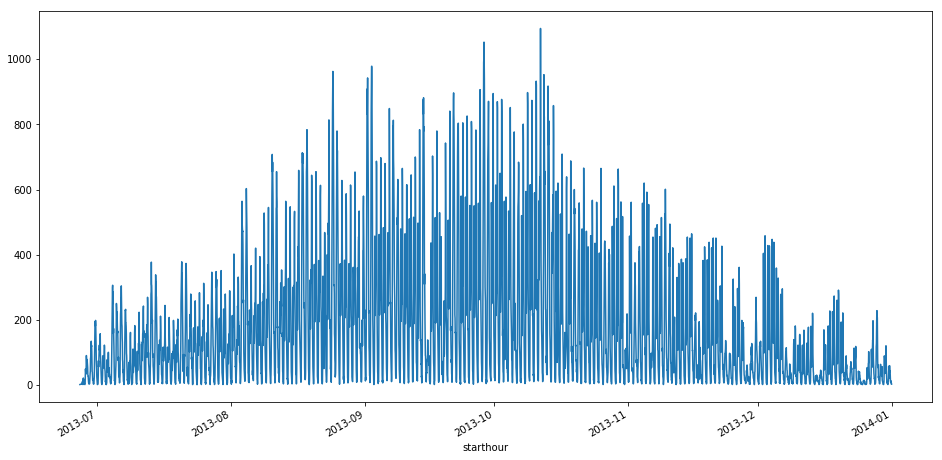

In [53]:
# number of trips started by starthour
divvy.groupby('starthour').size().plot(figsize=(16,8))

##### Distribution of trip duration

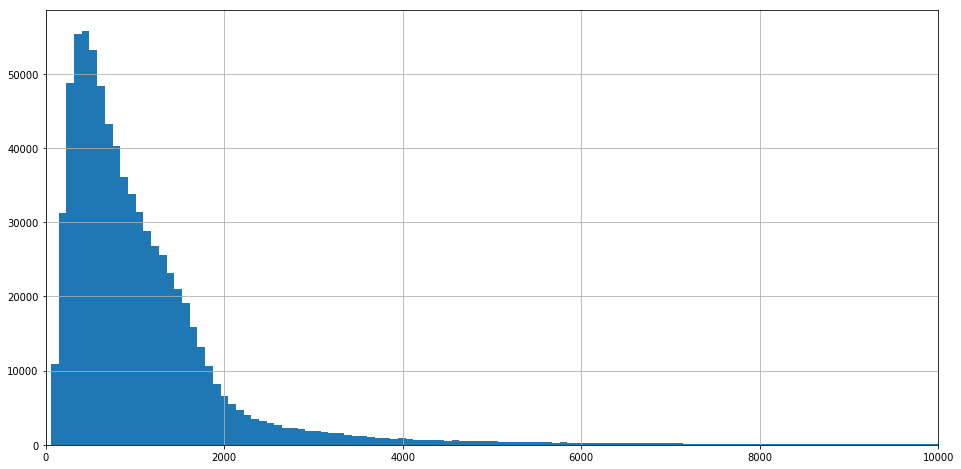

In [54]:
divvy.tripduration.hist(figsize=(16,8), bins=1000)
plt.xlim(0, 10000);

##### cumulative distribution of trip duration.

In [55]:
duration_counts = divvy.tripduration.value_counts()
duration_counts.index.name = 'seconds'
duration_counts.name = 'trips'
duration_counts.head()

seconds
408    712
399    711
346    706
379    701
415    700
Name: trips, dtype: int64

In [56]:
df = duration_counts.reset_index()
df['minutes'] = df.seconds/60.
df.set_index('minutes', inplace=True)

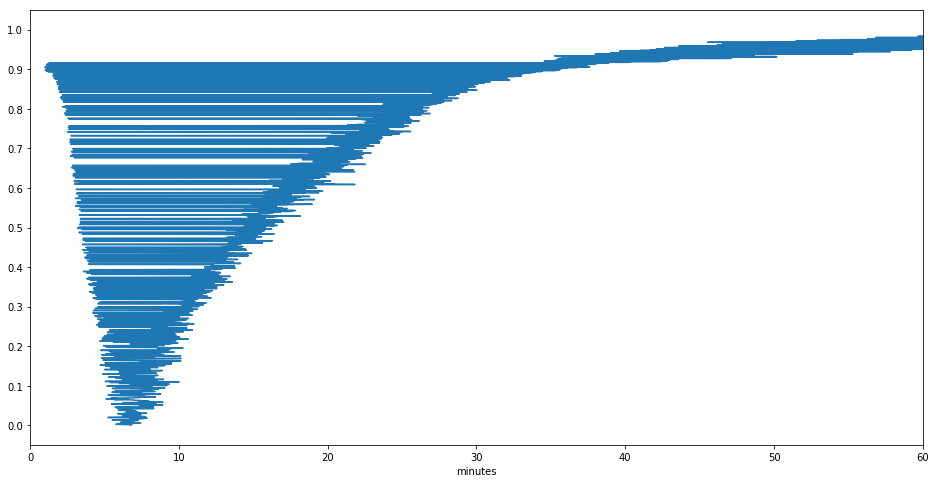

In [57]:
(df.trips.cumsum() / df.trips.sum()).plot(figsize=(16,8))
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1));

In [58]:
df = duration_counts.reset_index()
df['minutes'] = df.seconds/60.
df.set_index('minutes', inplace=True)
df.sort_index(inplace=True)

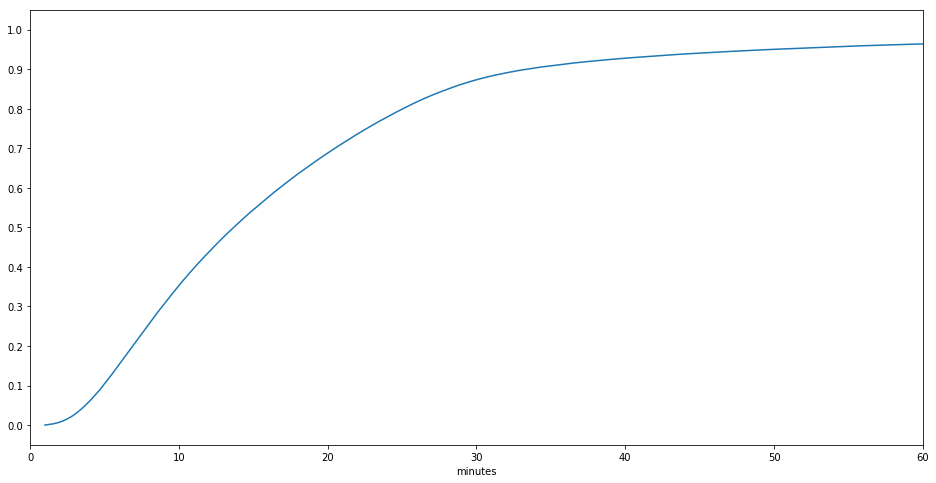

In [59]:
(df.trips.cumsum() / df.trips.sum()).plot(figsize=(16,8))
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1));

##### Number of trips per birth year

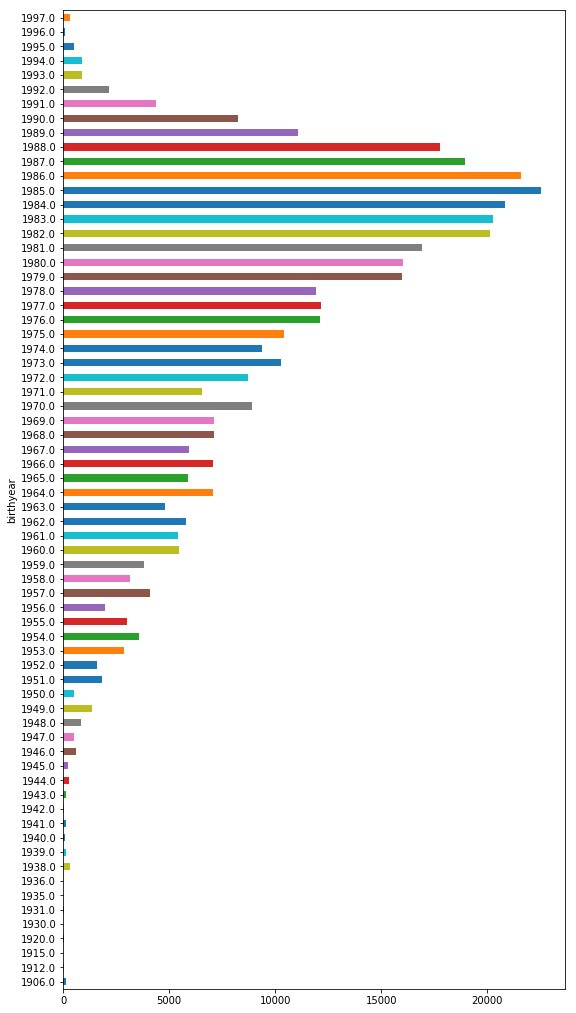

In [60]:
plt.figure(figsize=(9, 18))
divvy.groupby('birthyear').size().sort_index().plot(kind='barh')

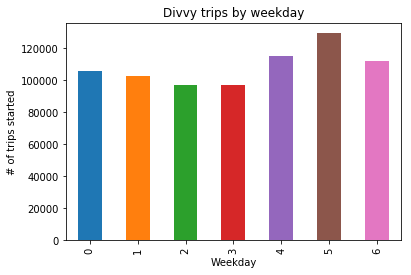

In [61]:
divvy.groupby(divvy['starttime'].apply(lambda d: d.dayofweek))['trip_id'].count().plot(kind='bar')
plt.title('Divvy trips by weekday') # 0 = Monday ...
plt.xlabel('Weekday')
plt.ylabel('# of trips started');

##### gender comparison

In [62]:
divvy['startdate'] = divvy.starthour.apply(lambda d: d.date())
by_gender = divvy.groupby(['startdate', 'gender']).size()

In [63]:
by_gender.head()

startdate   gender
2013-06-27  Female     14
            Male       45
2013-06-28  Female     75
            Male      321
2013-06-29  Female     42
dtype: int64

**Use unstack**

In [64]:
by_gender.unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14.0,45.0
2013-06-28,75.0,321.0
2013-06-29,42.0,163.0
2013-06-30,47.0,180.0
2013-07-01,87.0,449.0


In [65]:
# SELECT startdate
#    , COUNT(IF(gender = 'Female', 1, NULL))
#    , COUNT(IF(gender = 'Male', 1, NULL))
# FROM divvy
# GROUP BY startdate
# LIMIT 5;
divvy.groupby(['startdate', 'gender']).size().unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14.0,45.0
2013-06-28,75.0,321.0
2013-06-29,42.0,163.0
2013-06-30,47.0,180.0
2013-07-01,87.0,449.0


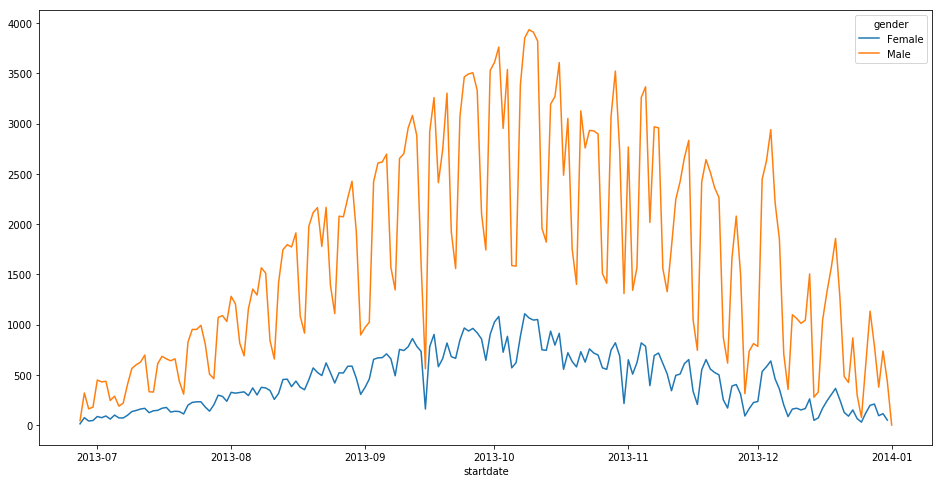

In [66]:
by_gender.unstack(1).plot(figsize=(16,8))

##### Consumer vs Subscriber

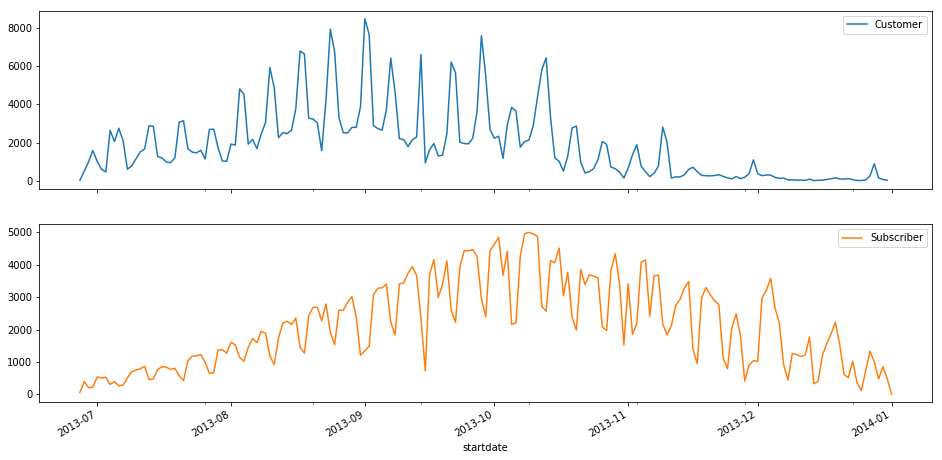

In [67]:
divvy.groupby(['startdate', 'usertype']).size().unstack(1).plot(figsize=(16,8), subplots=True);

##### Trips by weekday hour

### MultiIndex

In [68]:
weekdays = divvy['starttime'].apply(lambda d: d.dayofweek)
hours = divvy['starttime'].apply(lambda d: d.hour)
by_weekday_hour = divvy.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] 

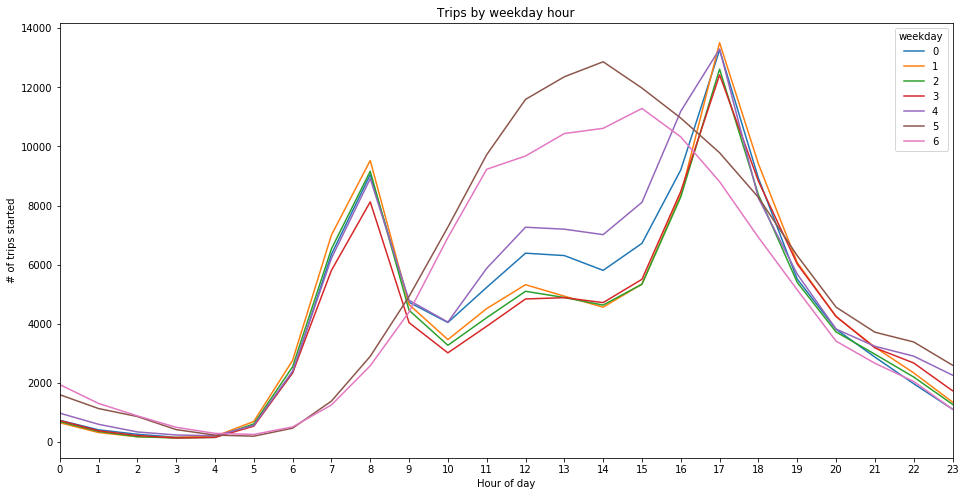

In [69]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);